# Evaluating the Results

Looking at the results below, it seems the best model we will use for this case is Multinomial Naive Bayes on Alphabet-Only Text without TF-IDF. Besides looking at the results, it's also because Multinomial Naive Bayes doesn't consume as much time as the other models we're using.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style(style ='whitegrid')

import re
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc, roc_auc_score 
from sklearn.metrics import balanced_accuracy_score, log_loss

In [2]:
import pickle
train_score = pickle.load(open('train_score.sav', 'rb'))
test_score = pickle.load(open('test_score.sav', 'rb'))
index_name = pickle.load(open('index_name.sav', 'rb'))
df_sentiment = pickle.load(open('sentiment_words.sav', 'rb'))

In [3]:
df_sentiment.head()

,alpha_title,stem_title,lemma_title,alpha_review,stem_review,lemma_review,alpha_combination,stem_combination,lemma_combination,Sentiment
0,some major design flaws,major design flaw,major design flaw,i had such high hopes for this dress and reall...,high hope dress realli want work initi order p...,high hope dress really wanted work initially o...,some major design flaws i had such high hopes ...,major design flaw high hope dress realli want ...,major design flaw high hope dress really wante...,1
1,my favorite buy,favorit buy,favorite buy,i love love love this jumpsuit it s fun fl...,love love love jumpsuit fun flirti fabul everi...,love love love jumpsuit fun flirty fabulous ev...,my favorite buy i love love love this jumps...,favorit buy love love love jumpsuit fun flirti...,favorite buy love love love jumpsuit fun flirt...,2
2,flattering shirt,flatter shirt,flatter shirt,this shirt is very flattering to all due to th...,shirt flatter due adjust front tie perfect len...,shirt flatter due adjustable front tie perfect...,flattering shirt this shirt is very flattering...,flatter shirt shirt flatter due adjust front t...,flatter shirt shirt flatter due adjustable fro...,2
3,not for the very petite,petit,petite,i love tracy reese dresses but this one is no...,love traci rees dress one petit feet tall usua...,love tracy reese dress one petite foot tall us...,not for the very petite i love tracy reese dre...,petit love traci rees dress one petit feet tal...,petite love tracy reese dress one petite foot ...,0
4,cagrcoal shimmer fun,cagrcoal shimmer fun,cagrcoal shimmer fun,i aded this in my basket at hte last mintue to...,ade basket hte last mintu see would look like ...,aded basket hte last mintue see would look lik...,cagrcoal shimmer fun i aded this in my basket ...,cagrcoal shimmer fun ade basket hte last mintu...,cagrcoal shimmer fun aded basket hte last mint...,2


In [4]:
train_error = pd.DataFrame(train_score, index=index_name)
test_error = pd.DataFrame(test_score, index=index_name)
error = pd.concat((train_error, test_error), axis=1)
error

,ROC AUC Macro Train,ROC AUC Weighted Train,F1 Macro Train,F1 Weighted Train,Balanced Accuracy Score Train,Log Loss Train,ROC AUC Macro Test,ROC AUC Weighted Test,F1 Macro Test,F1 Weighted Test,Balanced Accuracy Score Test,Log Loss Test
alpha_title_multi_nb,0.959946,0.963244,0.787137,0.889634,0.809898,3.585237e-01,0.858539,0.886654,0.607603,0.804344,0.612567,0.731238
stem_title_multi_nb,0.976582,0.978413,0.830715,0.913079,0.817315,2.156241e-01,0.818239,0.845558,0.552984,0.778776,0.541516,0.854089
lemma_title_multi_nb,0.977258,0.978986,0.831715,0.913593,0.820252,2.144713e-01,0.817842,0.845740,0.549183,0.778411,0.537545,0.847263
alpha_review_multi_nb,0.953466,0.955306,0.770475,0.869519,0.822721,9.681893e-01,0.892345,0.911727,0.646348,0.816198,0.681379,1.440893
stem_review_multi_nb,0.958344,0.958733,0.786932,0.880701,0.825531,5.083924e-01,0.881971,0.900650,0.617374,0.806316,0.630341,0.870485
lemma_review_multi_nb,0.958260,0.958508,0.785920,0.879890,0.825136,5.068162e-01,0.879233,0.898900,0.602618,0.800454,0.613504,0.883116
alpha_combination_multi_nb,0.967296,0.968000,0.807223,0.888954,0.861842,9.961314e-01,0.908515,0.927266,0.663162,0.828330,0.695499,1.530753
stem_combination_multi_nb,0.963506,0.964980,0.796566,0.885615,0.840689,5.546042e-01,0.898705,0.918027,0.643388,0.819352,0.661339,0.918296
lemma_combination_multi_nb,0.963435,0.964794,0.798084,0.886530,0.842361,5.510565e-01,0.897360,0.917312,0.630741,0.815192,0.648823,0.918122
alpha_title_multi_nb_tfidf,0.987696,0.989596,0.876799,0.940092,0.877505,1.533512e-01,0.860457,0.884927,0.594253,0.804365,0.583154,0.573417


In [5]:
title = [i for i in error.index if 'title' in i]
title_error = error.loc[title]
title_error

,ROC AUC Macro Train,ROC AUC Weighted Train,F1 Macro Train,F1 Weighted Train,Balanced Accuracy Score Train,Log Loss Train,ROC AUC Macro Test,ROC AUC Weighted Test,F1 Macro Test,F1 Weighted Test,Balanced Accuracy Score Test,Log Loss Test
alpha_title_multi_nb,0.959946,0.963244,0.787137,0.889634,0.809898,0.358524,0.858539,0.886654,0.607603,0.804344,0.612567,0.731238
stem_title_multi_nb,0.976582,0.978413,0.830715,0.913079,0.817315,0.215624,0.818239,0.845558,0.552984,0.778776,0.541516,0.854089
lemma_title_multi_nb,0.977258,0.978986,0.831715,0.913593,0.820252,0.214471,0.817842,0.845740,0.549183,0.778411,0.537545,0.847263
alpha_title_multi_nb_tfidf,0.987696,0.989596,0.876799,0.940092,0.877505,0.153351,0.860457,0.884927,0.594253,0.804365,0.583154,0.573417
stem_title_multi_nb_tfidf,0.980995,0.982917,0.846985,0.922912,0.822721,0.186739,0.835399,0.859145,0.554557,0.783373,0.535528,0.602590
lemma_title_multi_nb_tfidf,0.981593,0.983405,0.848811,0.923755,0.826850,0.184281,0.835191,0.859236,0.549541,0.782962,0.531930,0.603279
alpha_title_logReg_OVR,0.992443,0.994127,0.896968,0.951447,0.890319,0.118726,0.832299,0.867119,0.575556,0.794453,0.568170,0.830535
stem_title_logReg_OVR,0.989955,0.991605,0.878649,0.941791,0.868454,0.131116,0.778959,0.810990,0.558758,0.781722,0.552303,1.428392
lemma_title_logReg_OVR,0.990376,0.991975,0.879817,0.942403,0.870181,0.128640,0.779498,0.810568,0.556611,0.781875,0.548524,1.415894
alpha_title_logReg_OVR_tfidf,0.994450,0.995717,0.910283,0.957696,0.907299,0.097304,0.838943,0.870102,0.574249,0.792057,0.574313,1.359967


In [6]:
review = [i for i in error.index if 'review' in i]
review_error = error.loc[review]
review_error

,ROC AUC Macro Train,ROC AUC Weighted Train,F1 Macro Train,F1 Weighted Train,Balanced Accuracy Score Train,Log Loss Train,ROC AUC Macro Test,ROC AUC Weighted Test,F1 Macro Test,F1 Weighted Test,Balanced Accuracy Score Test,Log Loss Test
alpha_review_multi_nb,0.953466,0.955306,0.770475,0.869519,0.822721,9.681893e-01,0.892345,0.911727,0.646348,0.816198,0.681379,1.440893
stem_review_multi_nb,0.958344,0.958733,0.786932,0.880701,0.825531,5.083924e-01,0.881971,0.900650,0.617374,0.806316,0.630341,0.870485
lemma_review_multi_nb,0.958260,0.958508,0.785920,0.879890,0.825136,5.068162e-01,0.879233,0.898900,0.602618,0.800454,0.613504,0.883116
alpha_review_multi_nb_tfidf,0.975062,0.974202,0.827289,0.905964,0.787511,2.592868e-01,0.907445,0.924123,0.577492,0.797846,0.541086,0.418215
stem_review_multi_nb_tfidf,0.982571,0.981100,0.822775,0.904250,0.768044,2.502152e-01,0.887011,0.905157,0.521972,0.770780,0.483489,0.461860
lemma_review_multi_nb_tfidf,0.971897,0.971358,0.766889,0.877232,0.704708,2.921647e-01,0.885521,0.902983,0.509576,0.765919,0.475411,0.465258
alpha_review_logReg_OVR,0.999989,0.999989,0.999223,0.999555,0.998816,2.968781e-02,0.866202,0.888274,0.604816,0.809760,0.593143,0.691427
stem_review_logReg_OVR,0.999909,0.999905,0.993470,0.996306,0.990920,5.431313e-02,0.841773,0.864091,0.578787,0.794466,0.567609,0.773831
lemma_review_logReg_OVR,0.999533,0.999511,0.981749,0.989750,0.972895,1.084521e-01,0.863210,0.884867,0.577149,0.798613,0.557472,0.531892
alpha_review_logReg_OVR_tfidf,1.000000,1.000000,1.000000,1.000000,1.000000,5.154375e-08,0.885570,0.897838,0.600801,0.807817,0.582407,3.520746


In [7]:
combination = [i for i in error.index if 'combination' in i]
comb_error = error.loc[combination]
comb_error

,ROC AUC Macro Train,ROC AUC Weighted Train,F1 Macro Train,F1 Weighted Train,Balanced Accuracy Score Train,Log Loss Train,ROC AUC Macro Test,ROC AUC Weighted Test,F1 Macro Test,F1 Weighted Test,Balanced Accuracy Score Test,Log Loss Test
alpha_combination_multi_nb,0.967296,0.968000,0.807223,0.888954,0.861842,9.961314e-01,0.908515,0.927266,0.663162,0.828330,0.695499,1.530753
stem_combination_multi_nb,0.963506,0.964980,0.796566,0.885615,0.840689,5.546042e-01,0.898705,0.918027,0.643388,0.819352,0.661339,0.918296
lemma_combination_multi_nb,0.963435,0.964794,0.798084,0.886530,0.842361,5.510565e-01,0.897360,0.917312,0.630741,0.815192,0.648823,0.918122
alpha_combination_multi_nb_tfidf,0.982879,0.981614,0.868290,0.927249,0.847072,2.198836e-01,0.919782,0.936119,0.610337,0.815726,0.576222,0.389288
stem_combination_multi_nb_tfidf,0.988981,0.987788,0.880290,0.933838,0.844041,2.055390e-01,0.903062,0.920809,0.563693,0.792669,0.523839,0.429720
lemma_combination_multi_nb_tfidf,0.974858,0.975142,0.789251,0.888772,0.735995,2.709453e-01,0.903034,0.921096,0.552174,0.786357,0.513149,0.430855
alpha_combination_logReg_OVR,1.000000,1.000000,0.999803,0.999873,0.999662,1.646652e-02,0.890897,0.911522,0.633926,0.826748,0.619404,0.586487
stem_combination_logReg_OVR,0.999991,0.999991,0.998301,0.998982,0.997367,4.452684e-02,0.881660,0.902915,0.602271,0.811410,0.584451,0.553708
lemma_combination_logReg_OVR,0.999999,1.000000,0.999311,0.999555,0.998816,2.593149e-02,0.869684,0.893727,0.598142,0.810461,0.581910,0.680412
alpha_combination_logReg_OVR_tfidf,1.000000,1.000000,1.000000,1.000000,1.000000,3.823713e-08,0.900583,0.910300,0.640711,0.828111,0.622211,3.223883


## Looking at the model more

In [8]:
X = df_sentiment.drop('Sentiment', axis=1)
y = df_sentiment['Sentiment']

alpha_title_train, alpha_title_test, alpha_title_y_train, alpha_title_y_test = train_test_split(X['alpha_title'], y, test_size=0.2, stratify=y, random_state=0)

alpha_review_train, alpha_review_test, alpha_review_y_train, alpha_review_y_test = train_test_split(X['alpha_review'], y, test_size=0.2, stratify=y, random_state=0)

alpha_combination_train, alpha_combination_test, alpha_combination_y_train, alpha_combination_y_test = train_test_split(X['alpha_combination'], y, test_size=0.2, stratify=y, random_state=0)

In [9]:
model_title = Pipeline([('vect', CountVectorizer(max_features=10000, ngram_range=(1, 2))),
                        ('clf', MultinomialNB(alpha=0.1))])

model_review = Pipeline([('vect', CountVectorizer(max_features=10000, ngram_range=(1, 2))),
                     ('clf', MultinomialNB(alpha=1))])

model_combination = Pipeline([('vect', CountVectorizer(max_features=15000, ngram_range=(1, 2))),
                        ('clf', MultinomialNB(alpha=1))])

Title Model
Cross Validation Balanced Accuracy (Train Data):  [0.60790807 0.60549188 0.6194705  0.60729322 0.60128874]
Balanced Accuracy of Cross Val : 0.61 (+/- 0.01)
Balanced Accuracy Score (Test Data):  0.6125669646419161


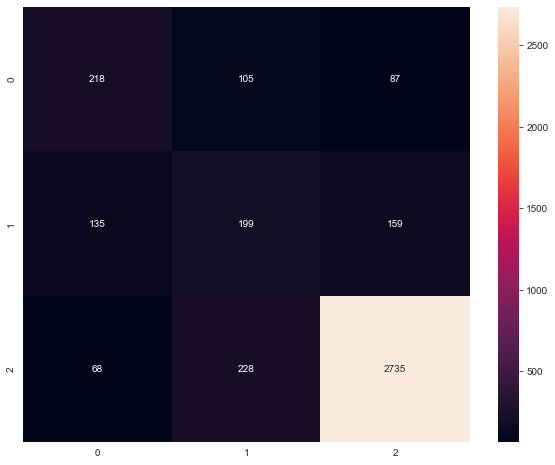

              precision    recall  f1-score   support

           0       0.52      0.53      0.52       410
           1       0.37      0.40      0.39       493
           2       0.92      0.90      0.91      3031

    accuracy                           0.80      3934
   macro avg       0.60      0.61      0.61      3934
weighted avg       0.81      0.80      0.80      3934



In [10]:
print('Title Model')
cross_score = cross_val_score(model_title, alpha_title_train, alpha_title_y_train, scoring='balanced_accuracy')
model_title.fit(alpha_title_train, alpha_title_y_train)
y_pred = model_title.predict(alpha_title_test)
score = balanced_accuracy_score(alpha_title_y_test, y_pred)
print('Cross Validation Balanced Accuracy (Train Data): ', cross_score)
print("Balanced Accuracy of Cross Val : %0.2f (+/- %0.2f)" % (cross_score.mean(), cross_score.std() * 2))
print('Balanced Accuracy Score (Test Data): ', score)
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(alpha_title_y_test, y_pred), annot=True, fmt='g')
plt.show()

print(classification_report(alpha_title_y_test, y_pred))

Review Model
Cross Validation Balanced Accuracy (Train Data):  [0.65858891 0.64042789 0.65549983 0.66353104 0.65650763]
Balanced Accuracy of Cross Val : 0.65 (+/- 0.02)
Balanced Accuracy Score (Test Data):  0.6813790004373798


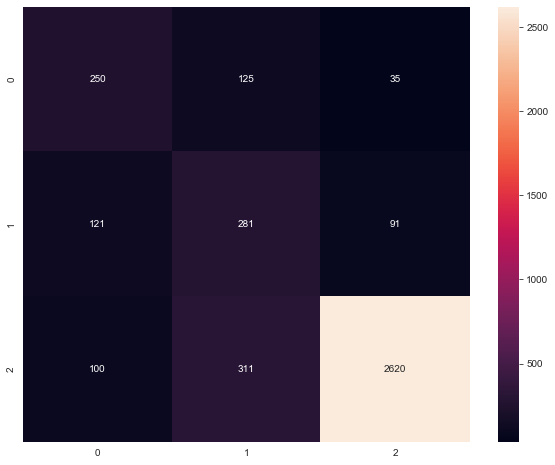

              precision    recall  f1-score   support

           0       0.53      0.61      0.57       410
           1       0.39      0.57      0.46       493
           2       0.95      0.86      0.91      3031

    accuracy                           0.80      3934
   macro avg       0.63      0.68      0.65      3934
weighted avg       0.84      0.80      0.82      3934



In [11]:
print('Review Model')
cross_score = cross_val_score(model_review, alpha_review_train, alpha_review_y_train, scoring='balanced_accuracy')
model_review.fit(alpha_review_train, alpha_review_y_train)
y_pred = model_review.predict(alpha_review_test)
score = balanced_accuracy_score(alpha_review_y_test, y_pred)
print('Cross Validation Balanced Accuracy (Train Data): ', cross_score)
print("Balanced Accuracy of Cross Val : %0.2f (+/- %0.2f)" % (cross_score.mean(), cross_score.std() * 2))
print('Balanced Accuracy Score (Test Data): ', score)
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(alpha_review_y_test, y_pred), annot=True, fmt='g')
plt.show()

print(classification_report(alpha_review_y_test, y_pred))

Combination Model
Cross Validation Balanced Accuracy (Train Data):  [0.68800875 0.66936002 0.68409149 0.68336626 0.68633028]
Balanced Accuracy of Cross Val : 0.68 (+/- 0.01)
Balanced Accuracy Score (Test Data):  0.6954987330601589


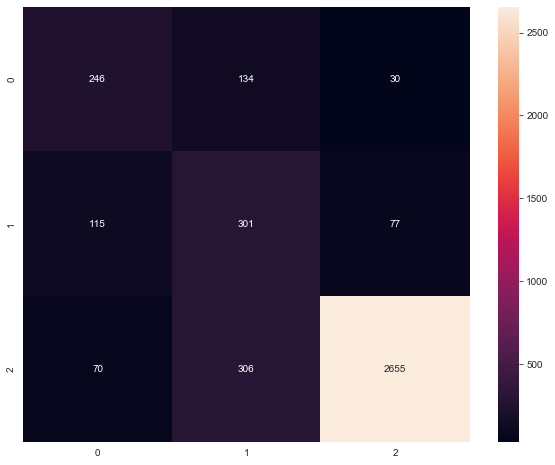

              precision    recall  f1-score   support

           0       0.57      0.60      0.59       410
           1       0.41      0.61      0.49       493
           2       0.96      0.88      0.92      3031

    accuracy                           0.81      3934
   macro avg       0.65      0.70      0.66      3934
weighted avg       0.85      0.81      0.83      3934



In [12]:
print('Combination Model')
cross_score = cross_val_score(model_combination, alpha_combination_train, alpha_combination_y_train, scoring='balanced_accuracy')
model_combination.fit(alpha_combination_train, alpha_combination_y_train)
y_pred = model_combination.predict(alpha_combination_test)
score = balanced_accuracy_score(alpha_combination_y_test, y_pred)
print('Cross Validation Balanced Accuracy (Train Data): ', cross_score)
print("Balanced Accuracy of Cross Val : %0.2f (+/- %0.2f)" % (cross_score.mean(), cross_score.std() * 2))
print('Balanced Accuracy Score (Test Data): ', score)
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(alpha_combination_y_test, y_pred), annot=True, fmt='g')
plt.show()

print(classification_report(alpha_combination_y_test, y_pred))

It seems our model has a hard time predicting Neutral and Negative Sentiments, this is because our data is heavily imbalanced.

## Testing the model

Our model can predict the word **love** really well, but has a hard time predicting the word **hate** which is suppose to be a Negative sentiment.

Looking at the dataset more closely, it's because there are a lot of text with **love** and **hate** in it, that's why the model is confused. But with this accuracy for first time project, i think it's good enough.

In [13]:
print(model_title.predict(['i love it']))
print(model_title.predict_proba(['i love it']))

print(model_review.predict(['i really love this dress it has everything i need']))
print(model_review.predict_proba(['i really love this dress it has everything i need']))

print(model_combination.predict(['i love it i really love this dress it has everything i need']))
print(model_combination.predict_proba(['i love it i really love this dress it has everything i need']))

[2]
[[0.01954736 0.01167093 0.96878171]]
[2]
[[4.61086798e-04 1.30339719e-03 9.98235516e-01]]
[2]
[[3.33282026e-05 1.00094176e-04 9.99866578e-01]]


In [14]:
print(model_title.predict(['i hate it']))
print(model_title.predict_proba(['i hate it']))

print(model_review.predict(['i hate how this dress makes me look']))
print(model_review.predict_proba(['i hate how this dress makes me look']))

print(model_combination.predict(['i hate it i hate how this dress makes me look']))
print(model_combination.predict_proba(['i hate it i hate how this dress makes me look']))

[2]
[[0.27812962 0.2670769  0.45479349]]
[1]
[[0.23009989 0.5525669  0.21733321]]
[1]
[[0.19316074 0.62291562 0.18392364]]


In [15]:
df_sentiment[df_sentiment['alpha_title'].isin([i for i in df_sentiment['alpha_title'] if 'hate' in i])]

,alpha_title,stem_title,lemma_title,alpha_review,stem_review,lemma_review,alpha_combination,stem_combination,lemma_combination,Sentiment
3106,love this dress hate the lining,love dress hate line,love dress hate lining,i love this dress and have already worn it a c...,love dress alreadi worn coupl time sinc purcha...,love dress already worn couple time since purc...,love this dress hate the lining i love this...,love dress hate line love dress alreadi worn c...,love dress hate lining love dress already worn...,2
5343,love hate,love hate,love hate,i love these jeans they are really cute and c...,love jean realli cute comfi howev way long bel...,love jean really cute comfy however way long b...,love hate i love these jeans they are really ...,love hate love jean realli cute comfi howev wa...,love hate love jean really cute comfy however ...,1
8378,love hate relationship with this dress,love hate relationship dress,love hate relationship dress,i love the look of this dress the fitting cou...,love look dress fit could use work top layer c...,love look dress fitting could use work top lay...,love hate relationship with this dress i love ...,love hate relationship dress love look dress f...,love hate relationship dress love look dress f...,1
8577,love and hate,love hate,love hate,i was excited when i saw these shorts in my lo...,excit saw short local retail store wear someti...,excite saw short local retailer store wear som...,love and hate i was excited when i saw these s...,love hate excit saw short local retail store w...,love hate excite saw short local retailer stor...,2
10884,cute but hate the side zipper,cute hate side zipper,cute hate side zipper,i love charlie trousers i must have pair i...,love charli trouser must pair sometim bought p...,love charlie trouser must pair sometimes bough...,cute but hate the side zipper i love charlie ...,cute hate side zipper love charli trouser must...,cute hate side zipper love charlie trouser mus...,2
11407,love the print hate the fit,love print hate fit,love print hate fit,i have a love hate relationship with this dres...,love hate relationship dress fabric print beau...,love hate relationship dress fabric print beau...,love the print hate the fit i have a love hat...,love print hate fit love hate relationship dre...,love print hate fit love hate relationship dre...,1
13323,love hate,love hate,love hate,i have a love hate relationship with these jea...,love hate relationship jean first put felt lik...,love hate relationship jean first put felt lik...,love hate i have a love hate relationship with...,love hate love hate relationship jean first pu...,love hate love hate relationship jean first pu...,1
14736,love and hate,love hate,love hate,this is a beautiful vest i love the color blo...,beauti vest love color block modern structur s...,beautiful vest love color block modern structu...,love and hate this is a beautiful vest i lov...,love hate beauti vest love color block modern ...,love hate beautiful vest love color block mode...,0
15636,love the style hate the dye left on my skin,love style hate dye left skin,love style hate dye leave skin,i recommend this product but with the followi...,recommend product follow reserv dye product co...,recommend product follow reservation dye produ...,love the style hate the dye left on my skin ...,love style hate dye left skin recommend produc...,love style hate dye leave skin recommend produ...,0
15650,love hate,love hate,love hate,i love this jump suit sorta looks great on ...,love jump suit sorta look great dye rub skin w...,love jump suit sorta look great dye rub skin w...,love hate i love this jump suit sorta looks...,love hate love jump suit sorta look great dye ...,love hate love jump suit sorta look great dye ...,0


## Conclusion

- The model i chose for this project ended up being **Multinomial Naive Bayes**
- The processed text data best for this ended up being the **Alphabet-only Lowered Text Data**
- Due to Imbalanced Dataset, our model had a hard time predicting the minority classes and thus only able to achieve a **Balanced Accuracy Score of 60-70%**

## Possible Solutions

Because only reaching a 60-70% is not that good, i believe there should be other things we could do to improve this model, but because lack of time, computation power, and experience i couldn't do it. Those things are:

- Do a lexicon-based approach, where instead of doing bag of words, train the machine learning model on the meaning of the words too, to achieve better understanding of the text data
- Use Oversampling technique such as SMOTE to deal with the imbalanced dataset
- Use Deep Learning

In [16]:
pickle.dump(model_title, open('model_title.sav', 'wb'))
pickle.dump(model_review, open('model_review.sav', 'wb'))
pickle.dump(model_combination, open('model_combination.sav', 'wb'))